In [1]:
from pylab import *
from percolation_cluster import visualize_percolation_cluster as P
from percolation_cluster import Percolation_Cluster

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
rcParams['figure.figsize'] = (12, 8)

In [3]:
L = 100
p = 0.6

P = Percolation_Cluster(p, L)
z = P()
lw, num = P.get_labels()
print(z)

[[False False False ...  True False  True]
 [ True False  True ...  True  True False]
 [ True  True False ... False False  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True False  True ...  True  True  True]]


In [4]:
num

284

In [5]:
lw[:10, :10]

array([[ 0,  0,  0,  1,  0,  0,  2,  2,  2,  2],
       [ 1,  0,  1,  1,  0,  0,  2,  2,  0,  2],
       [ 1,  1,  0,  1,  1,  0,  2,  0,  0,  0],
       [ 1,  1,  1,  1,  0,  0,  2,  2,  0,  0],
       [ 1,  0,  0,  0, 23,  0,  0,  0, 24, 24],
       [ 1,  1,  1,  1,  0,  0,  0,  0, 24, 24],
       [ 1,  1,  0,  0, 29, 29,  0, 24, 24, 24],
       [ 1,  1,  0,  0, 29,  0, 24, 24, 24, 24],
       [ 0,  0,  0,  0,  0,  0, 24, 24,  0, 24],
       [ 0,  0, 36, 36,  0,  0,  0, 24, 24,  0]], dtype=int32)

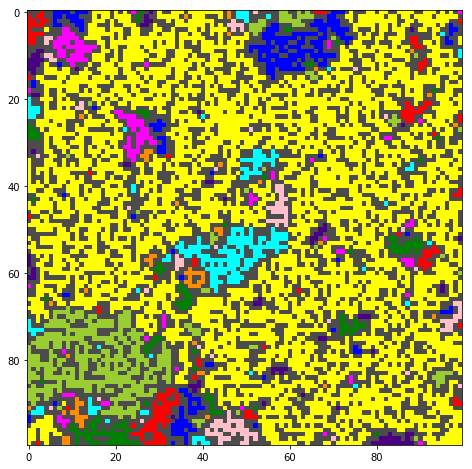

In [6]:
label_img = P.visualize_label()